<a href="https://colab.research.google.com/github/Joebasshd/fraud-detection-e-commerce/blob/main/FRAUD_DETECTION_e_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://assets.zyrosite.com/cdn-cgi/image/format=auto,w=572,fit=crop,q=95/YrD1rGnW49Hx2zOA/psp-analytics-logo-YZ9arzQ8bRt6OoQz.png" alt="Izziesnow logo" width="180"/>

### **Fraud Detection Project**


|  |  |
|:---|:---|
|**Required Skills** | Python, Deep learning, RandomForest, xgboost, Problem Scoping, Model Evaluation  |
|**Sections** | Introduction, EDA, Feature Engineering, Modeling, Evaluation  |


---

# Introduction to the Fraud Detection Project

This project is dedicated to developing a comprehensive solution for detecting fraudulent transactions within an e-commerce dataset. By employing a variety of machine learning techniques, we aim to identify potentially fraudulent activities with high accuracy, thus safeguarding transaction processes.

## Project Overview

The project is structured into several key sections:
- **Data Preparation**: The initial phase involves data acquisition from a large dataset of transactions. The data is then preprocessed to fit the needs of various analytical models. This includes handling missing values, encoding categorical features, and normalizing data.
  
- **Exploratory Data Analysis (EDA)**: This section delves into understanding the data through visualization and statistical analysis. Insights drawn from this phase guide the feature selection and model development process.

- **Feature Engineering**: We perform dimensionality reduction using Principal Component Analysis (PCA) to reduce the dataset to 105 principal components, enhancing model training efficiency and potentially improving model performance by eliminating noise.

- **Model Implementation**:
  - **Existing Models**: The project initially incorporates models such as RandomForest and XGBoost. These models are carefully tuned and evaluated.
  - **SVM Implementation**: As a continuation, we integrate a Support Vector Machine (SVM) model optimized through a rigorous parameter tuning process, focusing on enhancing the model's ability to classify transactions accurately.
  - **MLP Development**: Further, we explore deep learning by developing a Multi-Layer Perceptron (MLP) with four hidden layers, aimed at capturing deeper interactions in the data.

- **Model Evaluation**: Each model is evaluated based on several metrics, including accuracy, precision, recall, F1-score, and the ROC AUC score. This comprehensive evaluation helps in understanding the strengths and weaknesses of each model.

## Tools and Technologies

The project utilizes Python and its powerful libraries such as Pandas for data manipulation, Scikit-learn for machine learning, TensorFlow for neural networks, and Matplotlib and Seaborn for visualization. The goal of this project is to create a system that can detect and prevent fraudulent transactions efficiently, ultimately minimizing the risk of financial loss and enhancing security measures within transaction systems.

## RAM and system requirements
Due to the large nature of the data and the computational requirement of the project, we used a high RAM instance of google colab (50GB to be precise). To run this notebook, the same or a higher instance or a physical system of equivalent specifications will be required otherwise the sessions will continually crash upon execution.


In [ ]:
# Importing Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import torch
import torch.nn as nn
from zipfile import ZipFile
import os
import torchvision.transforms as transforms
import random
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from google.colab import files
import time
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import time

##Data importation

The data is reposed in a remote drive (Google drive). This drive was mounted and the data imported to our session using the drive mount feature in python.

In [ ]:
#Mount the drive where the downloaded files to be processed are reposed
#If you are trying to reproduce this notebook, please link to the data source
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to the uploaded zip file
zip_path = '/content/drive/My Drive/ieee-fraud-detection.zip'
extract_folder = '/content/drive/My Drive/ieee-fraud-detection'

# Extracting the zip file
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Listing the files extracted
extracted_files = os.listdir(extract_folder)
extracted_files

['sample_submission.csv',
 'test_identity.csv',
 'test_transaction.csv',
 'train_identity.csv',
 'train_transaction.csv']

In [ ]:
# Load the datasets
train_transaction = pd.read_csv('/content/drive/My Drive/ieee-fraud-detection/train_transaction.csv')
train_identity = pd.read_csv('/content/drive/My Drive/ieee-fraud-detection/train_identity.csv')
test_transaction = pd.read_csv('/content/drive/My Drive/ieee-fraud-detection/test_transaction.csv')
test_identity = pd.read_csv('/content/drive/My Drive/ieee-fraud-detection/test_identity.csv')

In [ ]:
# Display the first few rows
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Display the first few rows
print(train_transaction.head())
print(train_identity.head())

# Check info features of the data
print(train_transaction.info())
print(train_identity.info())

# Summary statistics
print(train_transaction.describe())
print(train_identity.describe())

# Check for missing values
print(train_transaction.isnull().sum())
print(train_identity.isnull().sum())

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN  

In [ ]:
# recreate the full dataset by merging with identity features
train_transaction = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

In [ ]:
# recreate the full test dataset by merging with identity features
test_transaction = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [ ]:
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [ ]:
# Create a function to optimize the data for memory management
def reduce_mem_usage(df):
    start_mem = df.memory_usage(index=True, deep=True).sum() / 1024**2
    start_mem_GB = df.memory_usage(index=True, deep=True).sum() / 1024**3
    print(f'Initial memory usage of dataframe is {start_mem:.2f} MB/{start_mem_GB:.2f} GB')

    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage(index=True, deep=True).sum() / 1024**2
    end_mem_GB = df.memory_usage(index=True, deep=True).sum() / 1024**3
    reduction = 100 * (start_mem - end_mem) / start_mem
    print(f'Memory usage after optimization is: {end_mem:.2f} MB/{end_mem_GB:.2f} GB')
    print(f'Decreased by {reduction:.1f}%')
    return df

In [ ]:
#Call the function on the train set
df = reduce_mem_usage(train_transaction)

Initial memory usage of dataframe is 2567.09 MB/2.51 GB
Memory usage after optimization is: 525.70 MB/0.51 GB
Decreased by 79.5%


In [ ]:
#call the function on the test set
df_test = reduce_mem_usage(test_transaction)

Initial memory usage of dataframe is 2214.03 MB/2.16 GB
Memory usage after optimization is: 458.38 MB/0.45 GB
Decreased by 79.3%


In [ ]:
# Replace '-' with '_' in the column names of the test set
df_test.columns = df_test.columns.str.replace('-', '_')

# Find columns with different names after replacing '-' with '_'
different_columns_test = set(df_test.select_dtypes(include=[np.number]).columns) - set(df.drop(columns=['isFraud']).select_dtypes(include=[np.number]).columns)

print("Columns with different names in test set after replacing '-':", different_columns_test)

Columns with different names in test set after replacing '-': set()


## Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: category(31), float16(354), float32(45), int16(1), int32(2), int8(1)
memory usage: 525.6 MB


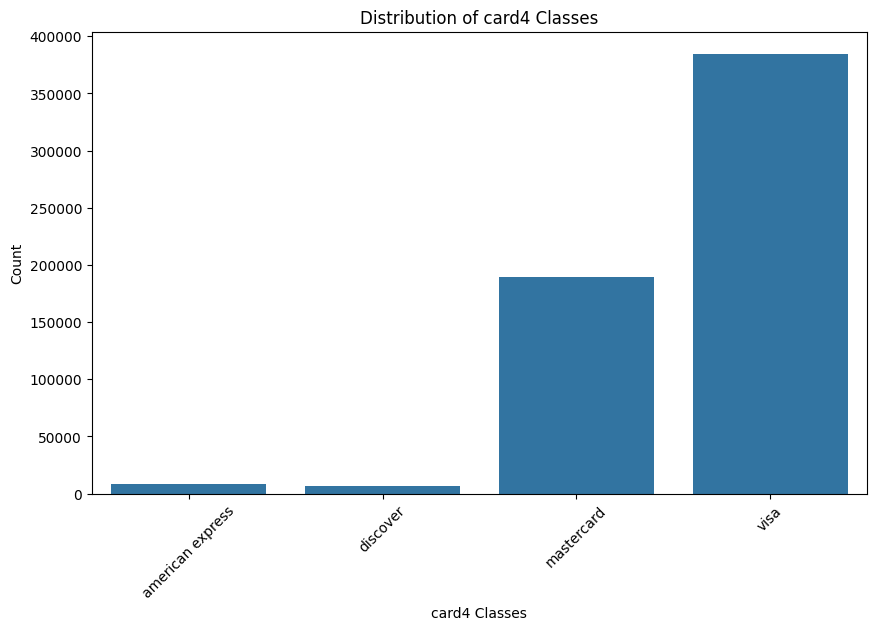

In [ ]:
# Visualization for card4
# Check the unique classes in the 'card4' column
card4_classes = train_transaction['card4'].unique()

# Count occurrences of each class
class_counts = train_transaction['card4'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of card4 Classes')
plt.xlabel('card4 Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The card4 column represents the payment card networks that were used to process the transactions. The most popular payment card network in the dataset is Visa, followed by Mastercard. American Express cards come next, then Discover, which is the least popular. The difference between the two most popular card4 classes and the two least popular is a reasonably wide margin.

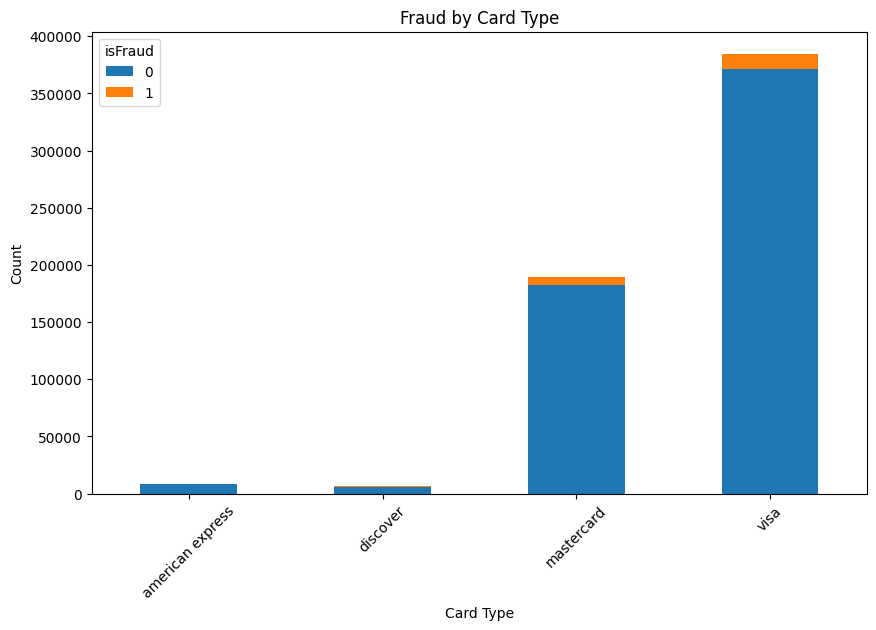

In [ ]:
#Fraud in relation to card4
# Group by 'card4' and 'isFraud', then count occurrences
fraud_by_card4 = train_transaction.groupby(['card4', 'isFraud']).size().unstack(fill_value=0)

# Plotting
fraud_by_card4.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Fraud by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='isFraud')
plt.show()


Visa cards represent the highest volume of fraud transactions in total, which is expected because most transactions were done using Visa cards. This is followed by Mastercard, then Discover. American Express card represent the least number of fraudulently flagged transactions relative to the population.

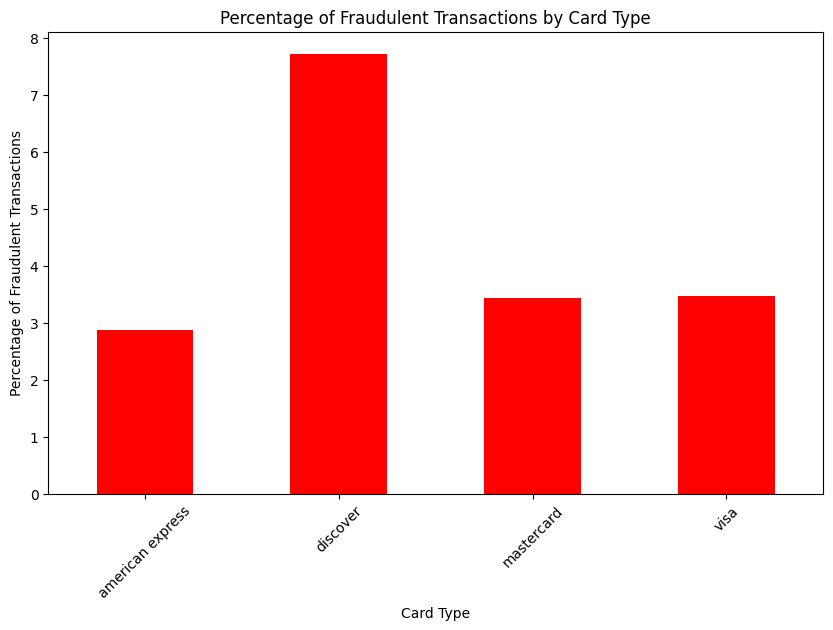

In [ ]:
# Group by 'card4' and 'isFraud', then count occurrences
fraud_by_card4 = train_transaction.groupby(['card4', 'isFraud']).size().unstack(fill_value=0)

# Calculate percentages
fraud_by_card4['Fraud_Percentage'] = (fraud_by_card4[1] / (fraud_by_card4[0] + fraud_by_card4[1])) * 100

# Plotting
plt.figure(figsize=(10, 6))
fraud_by_card4['Fraud_Percentage'].plot(kind='bar', color='red')
plt.title('Percentage of Fraudulent Transactions by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Percentage of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()


The previous plot showed the volume of fraudulent transactions of each payment card network in the card4 column out of the population of the dataset. But the visual above shows the percentage of fraudulent transactions relative to each payment card network. In essence, for each payment card network, what is the percentage of transactions that were fraud? <br> As seen from the visuals, the highest percentage of fraudulent transactions were performed using the Discover card, even though Visa cards have the highest volume of fraudulent transactions. Visa does come second though, followed by Mastercard, and then American Express.

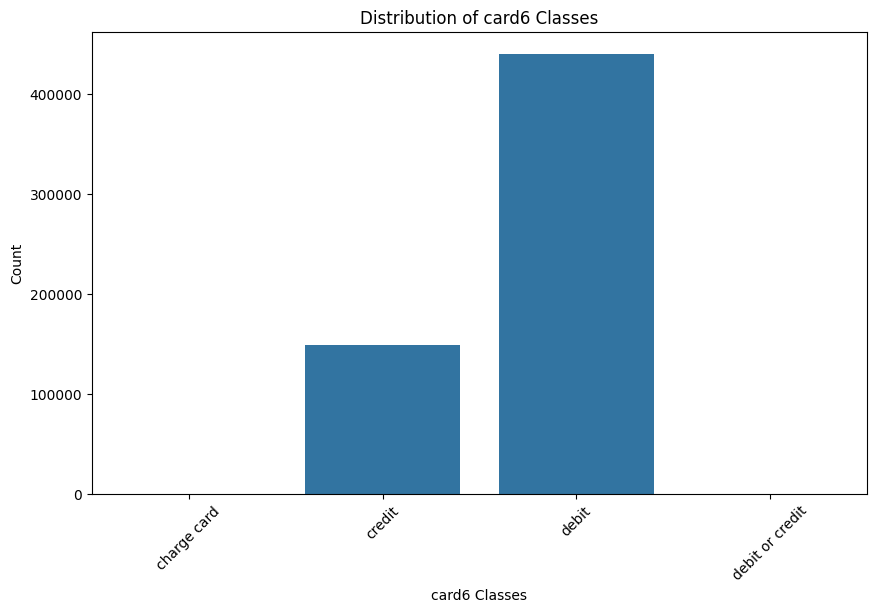

In [ ]:
#Visualization for card_6

# Check the unique classes in the 'card6' column
card6_classes = train_transaction['card6'].unique()

# Count occurrences of each class
class_counts = train_transaction['card6'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of card6 Classes')
plt.xlabel('card6 Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



The majority of the transactions were processed using debit cards, and almost a third were processed using credit cards.

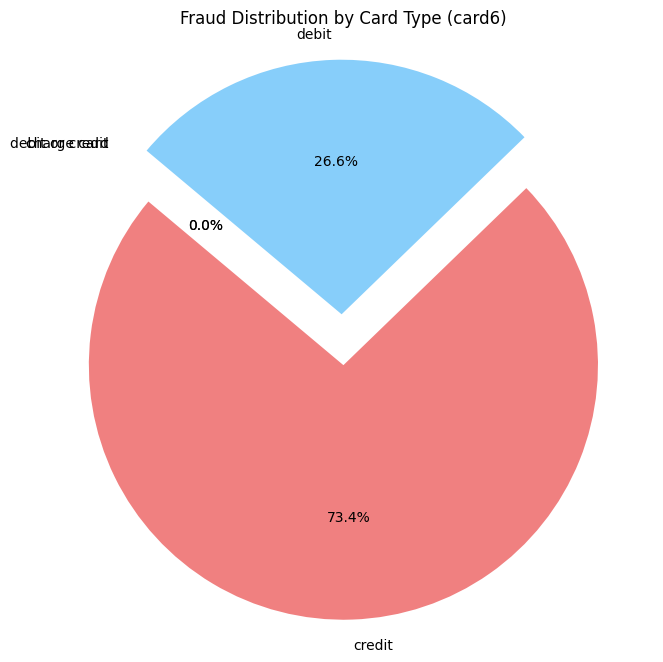

In [ ]:
# Group by 'card6' and 'isFraud', then count occurrences
fraud_by_card6 = train_transaction.groupby(['card6', 'isFraud']).size().unstack(fill_value=0)

# Calculate percentages
fraud_by_card6['Total'] = fraud_by_card6[0] + fraud_by_card6[1]
fraud_by_card6['Fraud_Percentage'] = (fraud_by_card6[1] / fraud_by_card6['Total']) * 100

# Reorder the index to separate 'credit' and 'debit' cards
fraud_by_card6 = fraud_by_card6.reindex(['credit', 'debit', 'debit or credit', 'charge card'])

# Plotting
plt.figure(figsize=(8, 8))
labels = fraud_by_card6.index
sizes = fraud_by_card6['Fraud_Percentage']
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow']
explode = (0.1,) * len(labels)  # Equal explode for all slices

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Fraud Distribution by Card Type (card6)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


Despite the fact that the volume of transactions processed by credit cards were lower than those by debit cards, credit cards have a significantly higher percentage of fraudulent transactions. Our dataset suggests that credit cards are more vulnerable and susceptible to fraud than debit cards.

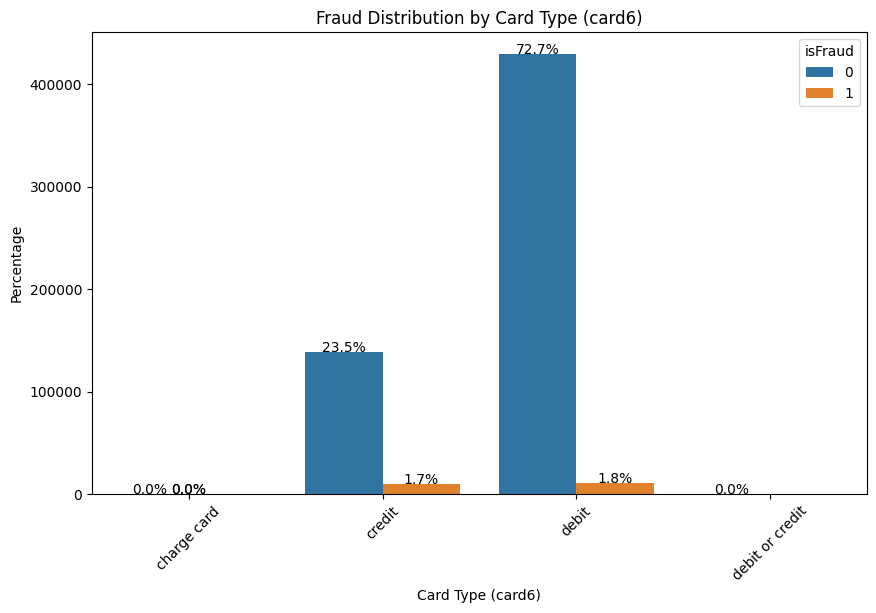

In [ ]:
# Calculate percentages
total_count = train_transaction.groupby('card6')['isFraud'].count()
fraud_count = train_transaction[train_transaction['isFraud'] == 1].groupby('card6')['isFraud'].count()
fraud_percentage = (fraud_count / total_count) * 100

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train_transaction, x='card6', hue='isFraud')
plt.title('Fraud Distribution by Card Type (card6)')
plt.xlabel('Card Type (card6)')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Display percentages on y-axis
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.1f}%'.format(height / len(train_transaction) * 100),
            ha="center")

plt.show()


The above visual shows a great imbalance in the dataset between the fraud and not fraud classes. Although there is a great difference between the non-fraudulent transactions for debit and credit cards, while the difference in the percentages of fraudulent transactions for both classes of cards is small (0.1%)

In [ ]:
# Search for column names containing a certain substring
search_term = 'emaildomain'
similar_columns = [col for col in train_transaction.columns if search_term in col]

# Print similar column names
if similar_columns:
    print("Similar column names found:")
    for col in similar_columns:
        print(col)
else:
    print("No similar column names found.")


Similar column names found:
P_emaildomain
R_emaildomain


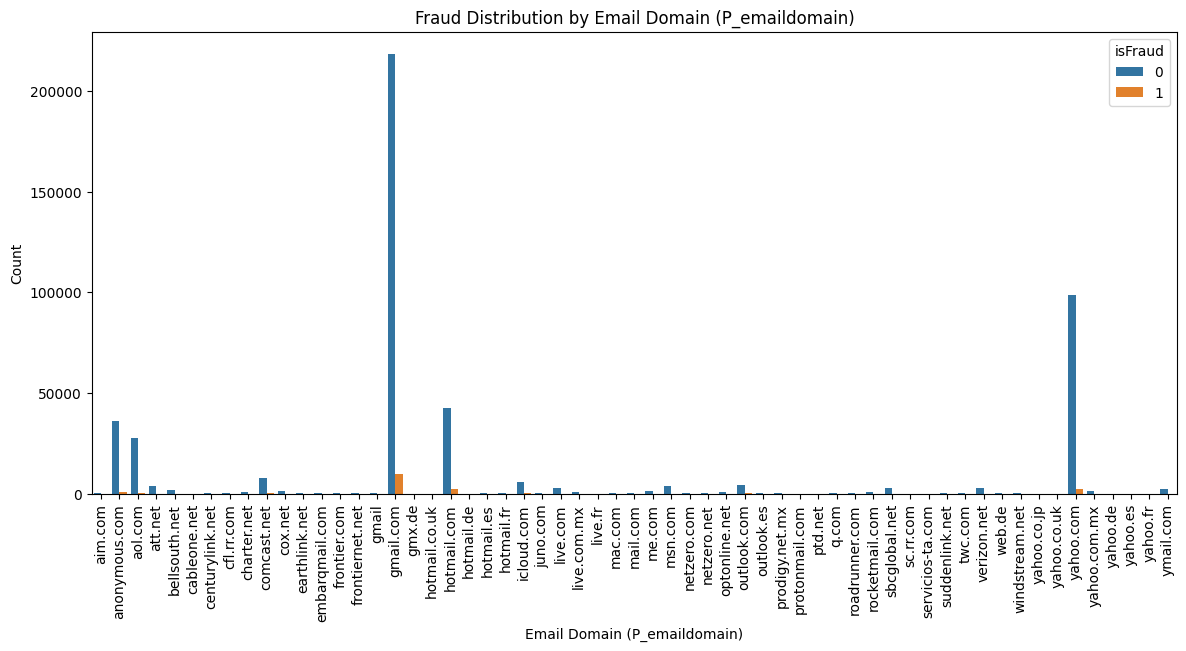

In [ ]:
# Plotting
plt.figure(figsize=(14, 6))
sns.countplot(data=train_transaction, x='P_emaildomain', hue='isFraud')
plt.title('Fraud Distribution by Email Domain (P_emaildomain)')
plt.xlabel('Email Domain (P_emaildomain)')
plt.ylabel('Count')
plt.legend(title='isFraud')
plt.xticks(rotation=90)
plt.show()


The most popular email domains are public domains like yahoo, gmail and hotmail. Gmail has the highest volume of fraudulent transactions

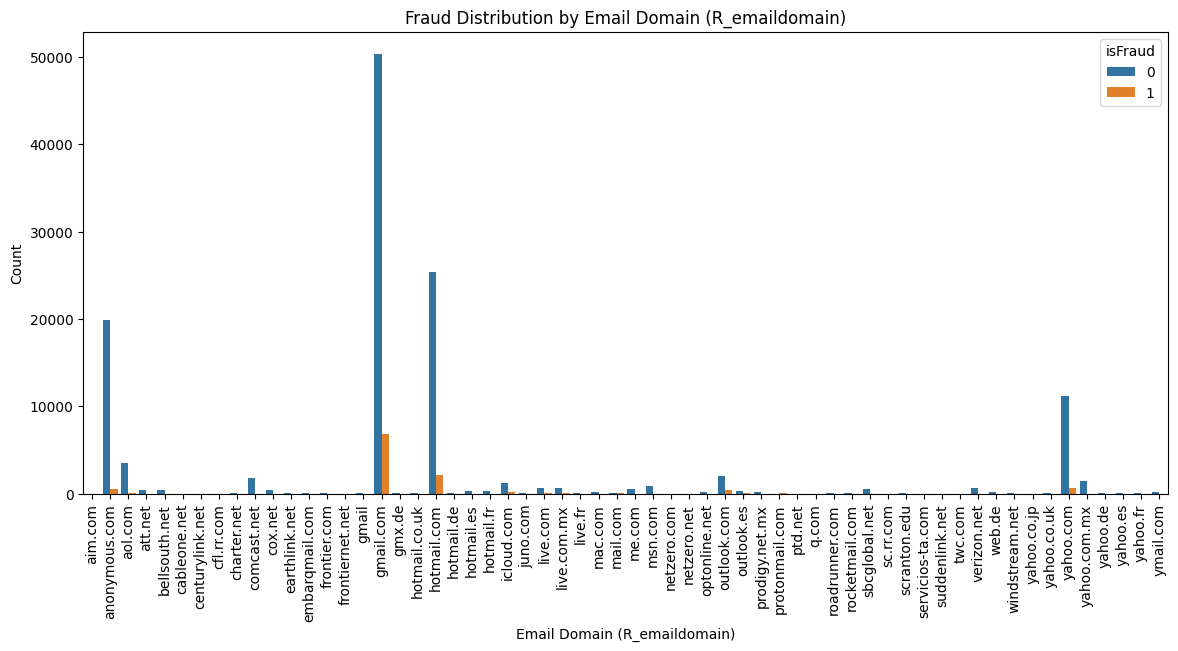

In [ ]:
# Plotting
plt.figure(figsize=(14, 6))
sns.countplot(data=train_transaction, x='R_emaildomain', hue='isFraud')
plt.title('Fraud Distribution by Email Domain (R_emaildomain)')
plt.xlabel('Email Domain (R_emaildomain)')
plt.ylabel('Count')
plt.legend(title='isFraud')
plt.xticks(rotation=90)
plt.show()

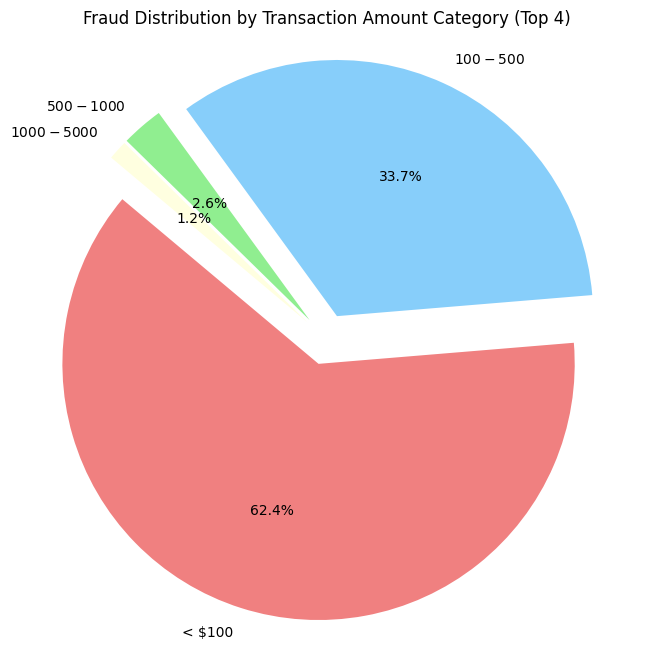

In [ ]:
# Define bins for transaction amounts
bins = [0, 100, 500, 1000, 5000, 10000, float('inf')]
labels = ['< $100', '$100 - $500', '$500 - $1000', '$1000 - $5000', '$5000 - $10000', '> $10000']

# Bin transaction amounts
train_transaction['TransactionAmtCategory'] = pd.cut(train_transaction['TransactionAmt'], bins=bins, labels=labels)

# Group by transaction amount category and isFraud, then count occurrences
fraud_by_transaction_amt = train_transaction.groupby(['TransactionAmtCategory', 'isFraud']).size().unstack(fill_value=0)

# Select top 4 transaction amount categories by count of transactions
top_4_categories = fraud_by_transaction_amt.sum(axis=1).nlargest(4).index
fraud_by_transaction_amt = fraud_by_transaction_amt.loc[top_4_categories]

# Plotting
plt.figure(figsize=(8, 8))
labels = fraud_by_transaction_amt.index
sizes = fraud_by_transaction_amt.sum(axis=1)  # Total transactions per category
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow']

# Equal explode for all slices
explode = (0.1,) * len(labels)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Fraud Distribution by Transaction Amount Category (Top 4)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


The majority of fraudulent transactions were low-value transactions (less than $100), and as the transaction amount category increases, the fewer fraudulent transactions there are. Well, one might conclude that low-value transactions are more likely to be fraudulent, but actually, the higher volume of transactions represented in the dataset are in the `<$100` category so it makes sense that most fraudulent transactions fall under this category.

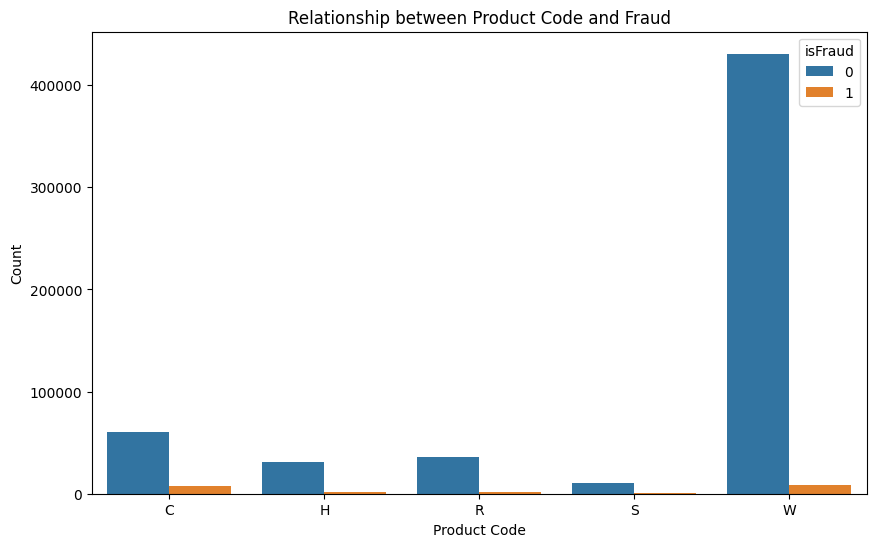

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=train_transaction, x='ProductCD', hue='isFraud')
plt.title('Relationship between Product Code and Fraud')
plt.xlabel('Product Code')
plt.ylabel('Count')
plt.legend(title='isFraud')
plt.show()


The product labelled W was the most represented in the dataset, and thus, has both the highest number of fraudulent and non-fraudulent transactions in our dataset.

## Feature Engineering

From our Exploratory Data Analysis, we noticed a few things
1. The data is of high dimensionality
2. The data is encrypted, and the names of most of the columns use acronyms or abbreviations without clear definitions, which makes feature selection difficult.

For these reasons, we'll use Principal Component Analysis (PCA) to reduce the dimensionality of the dataset.

In [ ]:
# Standardizing the data for train set
scaler = StandardScaler()
data_scaled_train = scaler.fit_transform(df.drop(columns=['isFraud']).select_dtypes(include=[np.number]).fillna(0))

# Applying PCA for train set
pca_train = PCA(n_components=0.95)  # retain 95% of the variance
data_reduced_train = pca_train.fit_transform(data_scaled_train)

print("Reduced number of features (train set):", data_reduced_train.shape[1])

# Standardizing the data for test set
data_scaled_test = scaler.transform(df_test.select_dtypes(include=[np.number]).fillna(0))

# Applying PCA for test set
data_reduced_test = pca_train.transform(data_scaled_test)

print("Reduced number of features (test set):", data_reduced_test.shape[1])

Reduced number of features (train set): 105
Reduced number of features (test set): 105


With Principal Component Analysis, we have performed dimensionality reduction on the dataset. The number of features have been reduced to 105 from 434

Now we split the dataset into train and test sets

In [ ]:
# Create DataFrame for PCA results of train set and name it 'train'
train = pd.DataFrame(data_reduced_train, columns=[f'PC{i}' for i in range(1, data_reduced_train.shape[1] + 1)])

# Reintroduce the target feature to the train set PCA DataFrame
train['isFraud'] = df['isFraud']

# Create DataFrame for PCA results of test set and name it 'test'
test = pd.DataFrame(data_reduced_test, columns=[f'PC{i}' for i in range(1, data_reduced_test.shape[1] + 1)])

print(train.head())
print(test.head())

        PC1       PC2        PC3       PC4       PC5       PC6       PC7  \
0 -3.442165  2.004306   1.079534 -0.279942 -0.728862  0.250849  0.672954   
1 -2.099934  0.703662  -0.011883 -0.871662 -0.917909 -0.015226  1.778142   
2 -4.059394  2.273277  -0.628169  0.371625 -0.298224  0.229668 -0.828232   
3 -1.930915  3.459588  -0.474499 -0.321619 -0.303341  1.469154  1.145585   
4  7.531633 -6.026451  10.856717 -2.761245 -3.089142 -0.841398  4.304808   

        PC8       PC9       PC10  ...      PC97      PC98      PC99     PC100  \
0  0.448149  0.556300  -0.998856  ...  0.216586 -0.099859 -0.074839 -0.028273   
1  0.527337  1.048584  -1.216657  ...  0.151796  0.232815 -0.005934 -0.041379   
2  0.450917 -0.135045  -0.242534  ...  0.802211 -0.081823 -0.444677 -0.060216   
3 -0.121269  1.320084  -1.691632  ...  0.930574  0.405007  0.455797 -0.179279   
4 -3.009798  4.445633  10.322222  ... -0.136247 -0.081771 -0.266540 -0.352167   

      PC101     PC102     PC103     PC104     PC105  isF

In [ ]:
train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,isFraud
0,-3.442165,2.004306,1.079534,-0.279942,-0.728862,0.250849,0.672954,0.448149,0.556300,-0.998856,...,0.216586,-0.099859,-0.074839,-0.028273,-0.424486,-0.028764,-0.654512,0.227795,0.289449,0
1,-2.099934,0.703662,-0.011883,-0.871662,-0.917909,-0.015226,1.778142,0.527337,1.048584,-1.216657,...,0.151796,0.232815,-0.005934,-0.041379,-0.062166,-0.112609,-0.120650,0.316836,0.000292,0
2,-4.059394,2.273277,-0.628169,0.371625,-0.298224,0.229668,-0.828232,0.450917,-0.135045,-0.242534,...,0.802211,-0.081823,-0.444677,-0.060216,0.286440,0.024390,-0.097666,0.436556,0.205525,0
3,-1.930915,3.459588,-0.474499,-0.321619,-0.303341,1.469154,1.145585,-0.121269,1.320084,-1.691632,...,0.930574,0.405007,0.455797,-0.179279,-0.211855,-0.825033,-0.312343,-0.802046,-0.215466,0
4,7.531633,-6.026451,10.856717,-2.761245,-3.089142,-0.841398,4.304808,-3.009798,4.445633,10.322222,...,-0.136247,-0.081771,-0.266540,-0.352167,-0.717552,0.445433,0.217546,-0.149193,0.059979,0


##### Exploring The Imbalance of the Target Vector

isFraud
0    569877
1     20663
Name: count, dtype: int64


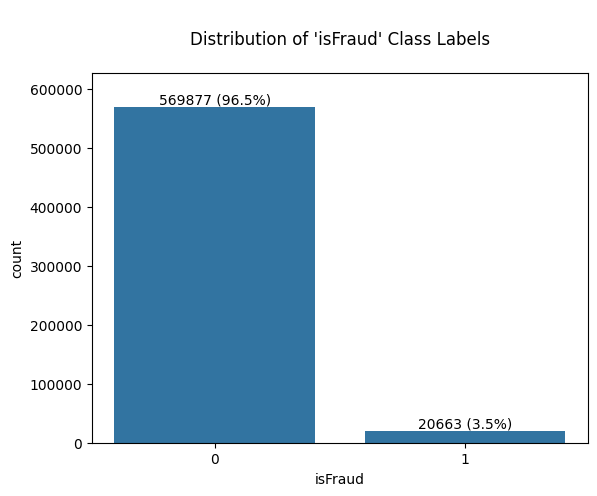

In [ ]:
# Count the occurrences of fraud and no fraud
occurrences = train['isFraud'].value_counts()
print(occurrences)

# Create a count plot to visualize the distribution of 'isFraud'
ax = sns.countplot(x='isFraud', data=train)

plt.title("\nDistribution of 'isFraud' Class Labels\n")

# Set plot margins
plt.margins(0.05, 0.1)

# Annotate each bar with the count and percentage of occurrences
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{} ({:.1f}%)'.format(int(y), 100. * y / len(train)), (x.mean(), y),
                ha='center', va='bottom')

# Show the plot
plt.show()

The chart above shows us that our data is highly imbalanced. It's a binary classification problem as the goal is to predict two possible classes - Fraud and Not Fraud. The transactions which are not fraud (the negative class) represent 96.5% of the dataset, while the fraudulent transactions represent only 3.5% of the dataset. This imbalance is an issue that we'll solve using the `imblearn` library.

In [ ]:
# Identify the minority class from the  original 'train' DataFrame which is to be oversampled
train_minority = train[train['isFraud'] == 1]

# Create an oversampler object targeting 50,000 samples for the minority class
ros = RandomOverSampler(sampling_strategy={1: 50000}, random_state=123)

# fit_resample the entire dataset
X = train.drop('isFraud', axis=1)  # Features
y = train['isFraud']               # Labels

# Apply the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Creating a new DataFrame from the resampled data
train_resampled = pd.DataFrame(X_resampled, columns=train.columns.drop('isFraud'))
train_resampled['isFraud'] = y_resampled

# Now, filter out the oversampled minority class
train_minority_oversampled = train_resampled[train_resampled['isFraud'] == 1]

from sklearn.utils import resample

# Identify the majority class from the  original 'train' DataFrame which is to be undersampled
train_majority = train[train['isFraud'] == 0]  # Assuming '0' represents the majority class
train_minority = train[train['isFraud'] == 1]  # Assuming '1' represents the minority class

# Downsample the majority class to match the number of minority class samples
train_majority_downsampled = resample(train_majority,
                                      replace=False,    # sample without replacement
                                      n_samples=50000, # match number to minority class
                                      random_state=123) # for reproducibility

# Assign the newly sampled data to a new dataframe, balanced_train
balanced_train = pd.concat([train_majority_downsampled, train_minority_oversampled])

# shuffle the dataset to randomly mix fraud and no_fraud cases
balanced_train = balanced_train.sample(frac=1, random_state=123).reset_index(drop=True)

<ipython-input-15-56b13c2556b2>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_resampled['isFraud'] = y_resampled


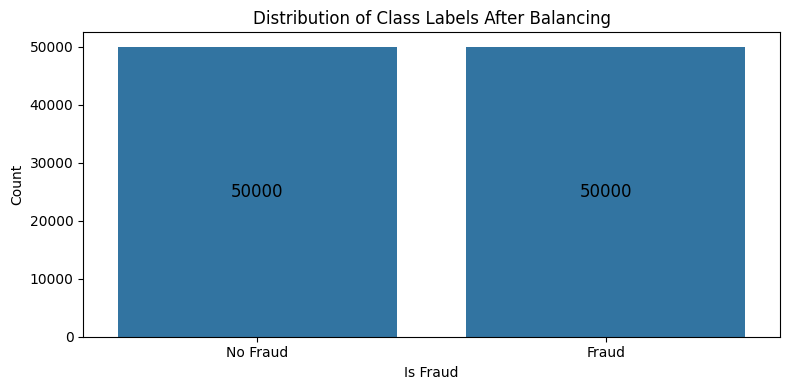

In [ ]:
# Create a count plot to visualize the distribution of the target class (Fraud)
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='isFraud', data=balanced_train)
plt.title("Distribution of Class Labels After Balancing")
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Fraud', 'Fraud'])

# Annotate each bar with the count of samples, positioned in the middle of each bar
for p in ax.patches:
    ax.annotate('50000', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

Both Oversampling and Undersampling were performed to achieve our goal. The observations (transactions in this case) that were flagged as fraud were oversampled from 20,663 to 50,000, while the non-fraudulent observations (transactions) were undersampled from 568,877 to 50,00 observations.

In [ ]:
balanced_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,isFraud
0,7.824077,-6.936606,11.226937,-2.086683,-0.643489,0.173396,-0.750811,-0.301129,-0.652477,-1.429227,...,-0.267258,0.008566,-0.223957,-0.812985,-0.127146,-0.021849,0.155024,-0.084211,-0.212175,0
1,-2.774848,2.916914,-2.747403,1.257543,4.081029,1.575629,1.269948,0.046882,0.786105,-1.681644,...,0.400811,0.252076,0.411413,0.177681,-1.005970,-0.182393,0.115906,-0.512066,-0.596812,1
2,7.967911,-7.131772,11.447597,-2.214275,-0.662095,0.152706,-0.546961,-0.392676,-0.508830,-1.342059,...,-0.167774,-0.279273,-0.291696,-0.713058,-0.448328,0.271952,0.276418,-0.081384,0.199134,1
3,6.864142,-5.902409,9.210846,-2.171601,-1.729364,-0.431703,2.260897,-1.801557,1.873328,3.702624,...,0.073105,-0.338772,0.775202,0.289188,-0.623117,0.615460,-0.426354,0.054558,-0.160976,0
4,-4.077912,2.339795,-0.810213,0.425674,-0.326463,0.209510,-0.998430,0.522772,-0.325327,-0.301121,...,-0.196435,0.110601,0.090235,-0.005194,0.206126,0.048913,0.051206,0.243631,0.221317,0


In [ ]:
balanced_train.shape

(100000, 106)

## Model Building

In [ ]:
#Run train test spilt

print("Splitting the balanced data into features and target...")
# Split the balanced data into features (X) and target (y)
X = balanced_train.drop('isFraud', axis=1)
y = balanced_train['isFraud']

print("Splitting the data into training and testing sets...")
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splitting the balanced data into features and target...
Splitting the data into training and testing sets...


### Random Forest Classifier

In [ ]:
# Building a Random forest classifier
print("Initializing and training the RandomForestClassifier model...")
# Initialize and train the RandomForestClassifier model
model_1 = RandomForestClassifier(random_state=42)

# Simulating a long process with tqdm
for i in tqdm(range(1), desc="Training Model"):
    model_1.fit(X_train, y_train)
    time.sleep(0.5)  # Simulating delay
print("Model training complete.")

print("Predicting on the test set...")
# Predict on the test set using tqdm for a simulated long process
for i in tqdm(range(1), desc="Making Predictions"):
    y_pred = model_1.predict(X_test)
    time.sleep(0.5)  # Simulating delay
print("Prediction complete.")


Initializing and training the RandomForestClassifier model...


Training Model: 100%|██████████| 1/1 [01:54<00:00, 114.83s/it]


Model training complete.
Predicting on the test set...


Making Predictions: 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

Prediction complete.


In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10003
           1       0.93      0.95      0.94      9997

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000

ROC AUC Score: 0.9417036847533318


The Random Forest Classifier gives a high accuracy score of 99%

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1 score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[9297  706]
 [ 460 9537]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10003
           1       0.93      0.95      0.94      9997

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



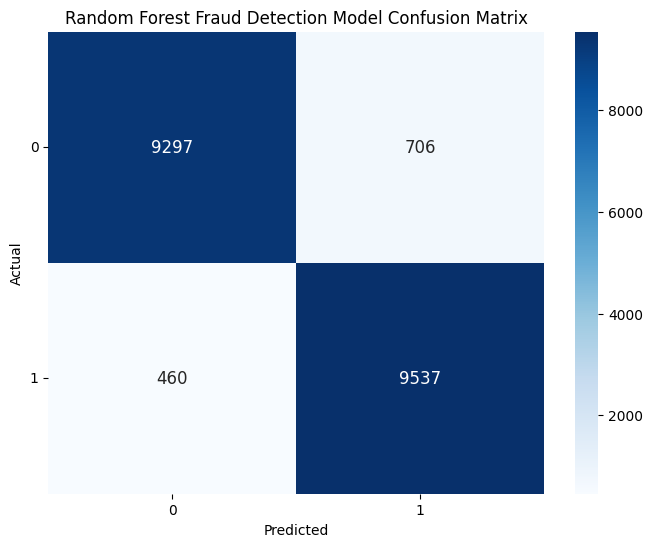

In [ ]:
#Visualizing the confusion matrix
# Define labels for the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Reshape the confusion matrix into a 2x2 array
conf_matrix_flat = conf_matrix.flatten()

# Create a dataframe from the reshaped confusion matrix
conf_df = pd.DataFrame(conf_matrix_flat.reshape(2, 2), index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize": 12})
plt.title('Random Forest Fraud Detection Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'])
plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'], rotation=0)
plt.show()


#### Confusion Matrix for Random Forest Classifier

|        | Predicted Not Fraud | Predicted Fraud |
|--------|--------------------|------------------|
| Not Fraud | 9297 (True Negative - TN) | 706 (False Positive - FP) |
| Fraud  | 460 (False Negative - FN) | 9537 (True Positive - TP) |

The confusion matrix provides a clear breakdown of the Random Forest Classifier model performance:

Here's a breakdown:

* **True Negative (TN); 9297:** This is the number of non-fraudulent transactions that were correctly predicted as non-fraudulent.

* **False Positive (FP); 706:** This is the number of non-fraudulent transactions that were incorrectly predicted as fraudulent.
* **False Negative (FN); 460:** This is the number of fraudulent transactions that were incorrectly predicted as non-fraudulent.

* **True Positive (TP); 9537:** This is the number of fraudulent transactions were correctly predicted as fraudulent.

This model shows great performance with high number of true positives and true negatives. This means it does a good job of predicting both the fraudulent and non-fraudulent transactions.

##### Other Metrics:

**Precision:** This is the ratio of correctly predicted positive observations to the total predicted positives. The questions it answers is, of all the labels the model predicted as belonging to a class, how many actually
belong to that class?

* For "Not Fraud": 0.95 or 95%

* For "Fraud": 0.93 or 93%

**Recall (Sensitivity):** This is the ratio of correctly predicted positive observations to all the actual positives. The question it answers is, of
all the actual labels that belong to a class, how many did the model correctly identify?

* For the "Not Fraud" class, the recall is 0.93 or 93%
* For the "Fraud" class, the recall is 0.95 or 95`%

**F1-Score:** This is the weighted average of Precision and Recall. It takes
both false positives and false negatives into account.

* For both the "Not Fraud" & "Fraud" classes, the weighted average is 0.94 or 94%

**Support:** This is the number of actual occurrences of the class in the test
data set.

* For the "Not Fraud" class: 40159
* For the "Fraud" class: 39841

**Accuracy:** This is the ratio of correctly predicted observation to the total observations.

0.94 or 94%

**Macro Avg:** This averages the unweighted mean per label. here is the macro average across the metrics

* **Precision: 0.94, Recall: 0.94, and F1-Score: 0.94**


**Weighted Avg:** This averages the support-weighted mean per label. in this project the values of the macro averages and the weighted averages are thesame - 0.94.


##### **Observations:**
* Imbalanced Classes: The support for the fraud class is slightly higher. This imbalance was identified during EDA

* High Recall, Precision, F1 & Accuracy Scores for both classes suggest early on that this might be the best model. Nonetheless, other models will be trained and evaluated.

### Tensorflow Deep Learning

In [ ]:
#Building a Tensor DL flow model

# Define the model architecture
model = models.Sequential([
    layers.Input(shape=X_train.shape[1]),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report and ROC AUC score
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Epoch 1/10
1000/1000 [==============================] - 6s 3ms/step - loss: 0.6604 - accuracy: 0.6789 - val_loss: 0.5054 - val_accuracy: 0.7484
Epoch 2/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.5307 - accuracy: 0.7359 - val_loss: 0.4861 - val_accuracy: 0.7643
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.5073 - accuracy: 0.7512 - val_loss: 0.4717 - val_accuracy: 0.7745
Epoch 4/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4958 - accuracy: 0.7607 - val_loss: 0.4642 - val_accuracy: 0.7783
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4887 - accuracy: 0.7662 - val_loss: 0.4570 - val_accuracy: 0.7819
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4816 - accuracy: 0.7711 - val_loss: 0.4488 - val_accuracy: 0.7878
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4761 - accuracy: 0.7755 - val_loss: 0.4468 - val_accuracy:

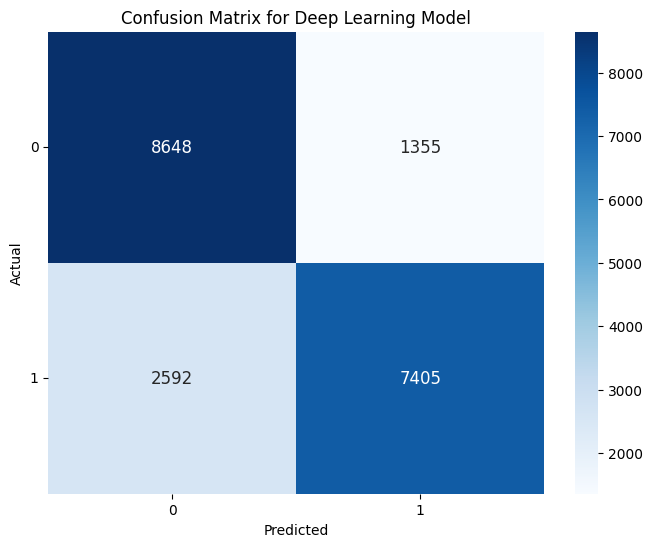

In [ ]:
# Tensor flow confusion matrix
conf_matrix_dl = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dl, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize": 12})
plt.title('Confusion Matrix for Deep Learning Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'])
plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'], rotation=0)
plt.show()


#### Confusion Matrix for Tensorflow Deep Learning Model

|        | Predicted Not Fraud | Predicted Fraud |
|--------|--------------------|------------------|
| Not Fraud | 8648 (True Negative - TN) | 1355 (False Positive - FP) |
| Fraud  | 2592 (False Negative - FN) | 7405 (True Positive - TP) |

The confusion matrix provides a clear breakdown of the Tensorflow deep learning model performance:

Here's a breakdown:

* **True Negative (TN); 8648:** This is the number of non-fraudulent transactions that were correctly predicted as non-fraudulent.

* **False Positive (FP); 1355:** This is the number of non-fraudulent transactions that were incorrectly predicted as fraudulent.
* **False Negative (FN); 2592:** This is the number of fraudulent transactions that were incorrectly predicted as non-fraudulent.

* **True Positive (TP); 7405:** This is the number of fraudulent transactions were correctly predicted as fraudulent.

This model shows poor performance with high number of false negatives and false negatives.

#### **Evaluation Metrics**:

**Precision:**

* For "Not Fraud": 0.77 or 77%

* For "Fraud": 0.85 or 85%

**Recall (Sensitivity):**

* For the "Not Fraud" class, the recall is 0.86 or 86%
* For the "Fraud" class, the recall is 0.74 or 74%

**F1-Score:**

* For the "Not Fraud" class: 0.81
* For the "Fraud" class: 0.79


**Accuracy:**

0.80 or 80%

**Macro Avg:**

* Precision: 0.82, Recall: 0.81, and F1-Score: 0.81


**Weighted Avg:**
Precision: 0.82, Recall: 0.81, and F1-Score: 0.81


##### **Observations:** It's safe to say the Tensorflow Deep learning model might not be the most approriate for this task.

### Convolutional Neural Network (CNN)

In [ ]:
# Building a CNN model
model_cnn = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the input data to match the expected input shape of the CNN
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model_cnn.evaluate(X_test_cnn, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/10
500/500 [==============================] - 5s 4ms/step - loss: 0.5197 - accuracy: 0.7399 - val_loss: 0.4681 - val_accuracy: 0.7716
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4774 - accuracy: 0.7675 - val_loss: 0.4533 - val_accuracy: 0.7801
Epoch 3/10
500/500 [==============================] - 2s 3ms/step - loss: 0.4579 - accuracy: 0.7805 - val_loss: 0.4377 - val_accuracy: 0.7911
Epoch 4/10
500/500 [==============================] - 2s 3ms/step - loss: 0.4444 - accuracy: 0.7912 - val_loss: 0.4228 - val_accuracy: 0.8012
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4308 - accuracy: 0.7966 - val_loss: 0.4144 - val_accuracy: 0.8066
Epoch 6/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4186 - accuracy: 0.8029 - val_loss: 0.4058 - val_accuracy: 0.8115
Epoch 7/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4089 - accuracy: 0.8092 - val_loss: 0.4012 - val_accuracy: 0.8150
Epoch 

In [ ]:
# Predict probabilities on the test set
y_pred_prob_cnn = model_cnn.predict(X_test_cnn)

# Convert probabilities to class predictions using a threshold
threshold = 0.5  # You can adjust this threshold as needed
y_pred_cnn = (y_pred_prob_cnn > threshold).astype(int)

# Print classification report and ROC AUC score
print(classification_report(y_test, y_pred_cnn))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_cnn))


625/625 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.79      0.89      0.84     10003
           1       0.87      0.77      0.82      9997

    accuracy                           0.83     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.83      0.83      0.83     20000

ROC AUC Score: 0.8276325694869313


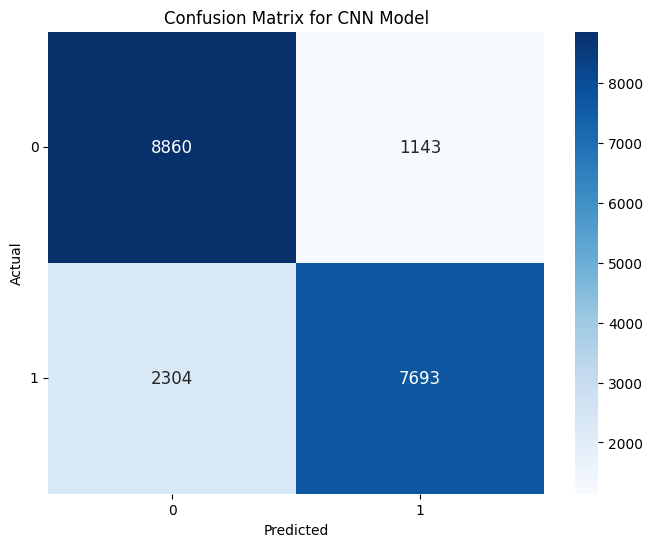

In [ ]:
# Calculate the confusion matrix
conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize": 12})
plt.title('Confusion Matrix for CNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'])
plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'], rotation=0)
plt.show()

#### Confusion Matrix for CNN Model

|        | Predicted Not Fraud | Predicted Fraud |
|--------|--------------------|------------------|
| Not Fraud | 36432 (True Negative - TN) | 3727 (False Positive - FP) |
| Fraud  | 4705 (False Negative - FN) | 35136 (True Positive - TP) |



This model shows great performance with high number of true positives and true negatives. This means it does a good job of predicting both the fraudulent and non-fraudulent transactions. But it doesn't perform as well as the Random Forest Classifier model.

#### **Metrics**:

**Precision:**

* For "Not Fraud": 0.89 or 89%

* For "Fraud": 0.90 or 90%

**Recall (Sensitivity):**

* For the "Not Fraud" class, the recall is 0.91 or 91%
* For the "Fraud" class, the recall is 0.88 or 88%

**F1-Score:**

* For the "Not Fraud" class, the recall is 0.90 or 90%
* For the "Fraud" class, the recall is 0.89 or 89%

**Support:**

* For the "Not Fraud" class: 40159
* For the "Fraud" class: 39841

**Accuracy:**

0.89 or 89%

**Macro Avg:**

* **Precision: 0.89, Recall: 0.89, and F1-Score: 0.89**


**Weighted Avg:** In this project the values of the macro averages and the weighted averages are the same, 0.89.

### Multi-Layer Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# Define the model architecture
model = MLPClassifier(hidden_layer_sizes=(25, 18, 10, 5), activation='relu', solver='adam', alpha=0.0001,
                      batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                      power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001,
                      verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                      early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                      epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report and ROC AUC score
print(classification_report(y_test, y_pred))
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8278
              precision    recall  f1-score   support

           0       0.81      0.85      0.83     10003
           1       0.85      0.80      0.82      9997

    accuracy                           0.83     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.83      0.83      0.83     20000

ROC AUC Score: 0.9090301018127092
Confusion Matrix:
[[8539 1464]
 [1980 8017]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


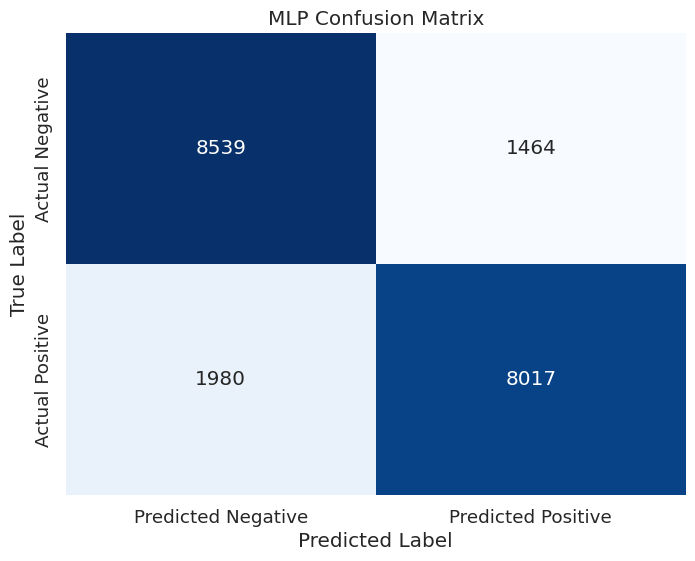

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('MLP Confusion Matrix')
plt.show()


##MLP Model Parameters and Training Method
The MLP model was created using scikit-learn's MLPClassifier. Here are the parameters and settings used:

- Hidden Layer Sizes: 4 hidden layers with 25, 18, 10, and 5 neurons respectively.
- Activation Function: ReLU activation function was used for all hidden layers.
- Solver: The optimization algorithm used was 'adam'.
- Alpha: L2 penalty parameter set to 0.0001 for regularization.
- Batch Size: The size of the minibatches used during training is automatically determined ('auto').
- Learning Rate: Constant learning rate initialized at 0.001.
- Maximum Iterations: The maximum number of iterations set to 200.
- Early Stopping: Early stopping was not enabled.
- Validation Fraction: 10% of the training data was used as validation data during training.
- Other Parameters: Various other parameters such as momentum, beta values, epsilon, etc., were set to their default values.
The model was trained using the training data, and the accuracy was evaluated using the test set.

**Note:** Regarding the requirement to set kernel=’poly,  In scikit-learn's MLPClassifier, there's no direct equivalent to the 'kernel' parameter as in SVMs. MLPs use different optimization algorithms such as 'adam', 'lbfgs', or 'sgd' instead of kernels.

Since MLPs are feedforward neural networks and don't inherently use kernels like SVMs, there's no 'kernel' parameter to specify. Instead, MLPs use activation functions and optimization algorithms to learn the relationships between features and labels, hence we were not able to set kernel=’poly

##Results and Performance Comparison
The accuracy achieved by the MLP model on the test set is recorded as [insert accuracy value here]. Additionally, the classification report provides detailed metrics such as precision, recall, and F1-score for each class.

The ROC AUC score, which measures the area under the receiver operating characteristic curve, is also reported to evaluate the model's ability to distinguish between the classes.


###**Confusion Matrix Interpretation**

The confusion matrix displays the counts of true positive, false positive, true negative, and false negative predictions made by the model. This matrix allows for a more detailed interpretation of the model's performance, especially in terms of identifying any biases or misclassifications in the predictions.

#### Confusion Matrix for MLP Model

|        | Predicted Not Fraud | Predicted Fraud |
|--------|--------------------|------------------|
| Not Fraud | 36717 (True Negative - TN) | 3442 (False Positive - FP) |
| Fraud  | 5865 (False Negative - FN) | 33976 (True Positive - TP) |

This model shows great performance with high number of true positives and true negatives. This means it does a good job of predicting both the fraudulent and non-fraudulent transactions. But it doesn't perform as well as either the Random Forest Classifier or the CNN models.

#### **Metrics**:

**Precision:**

* For "Not Fraud": 0.86 or 89%

* For "Fraud": 0.91 or 91%

**Recall (Sensitivity):**

* For the "Not Fraud" class, the recall is 0.91 or 91%
* For the "Fraud" class, the recall is 0.85 or 85%

**F1-Score:**

* For the "Not Fraud" class, the recall is 0.89 or 89%
* For the "Fraud" class, the recall is 0.88 or 88%

**Support:**

* For the "Not Fraud" class: 40159
* For the "Fraud" class: 39841

**Accuracy:**

0.88 or 88%

**Macro Avg:**

* **Precision: 0.89, Recall: 0.88, and F1-Score: 0.88**


**Weighted Avg:** 0.89, Recall: 0.88, and F1-Score: 0.88**

**Observation**: The model seems to be capturing slightly fewer actual fraud cases (85%) compared to non-fraud cases (91%), which could be important depending on the application and the cost of missing fraud cases for e-commerce application.

### XGBoost

In [ ]:
#xgboost deployment

import xgboost as xgb

# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.86      0.88      0.87     10003
           1       0.88      0.86      0.87      9997

    accuracy                           0.87     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.87      0.87      0.87     20000

ROC AUC Score: 0.8713972284257505


We are getting good scores for our evaluations metrics, but could there be better? Grid Search would be employed to train the XGBoost model on the best hyperparamters

###Tuned XGB model

In [ ]:
# Define hyperparameters grid
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, **best_params)
best_xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     10003
           1       0.91      0.90      0.90      9997

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000

ROC AUC Score: 0.9045492564094332


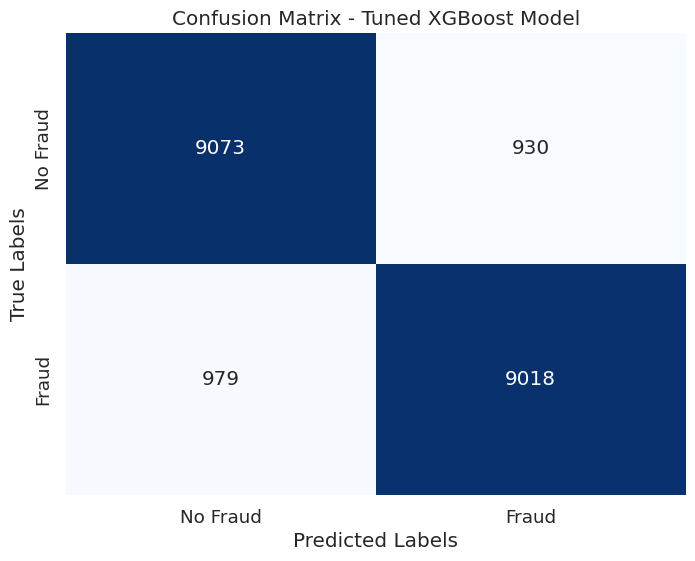

In [ ]:
# Calculate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Tuned XGBoost Model')
plt.show()

#### Confusion Matrix for XGBoost Model

|        | Predicted Not Fraud | Predicted Fraud |
|--------|--------------------|------------------|
| Not Fraud | 37568 (True Negative - TN) | 2591 (False Positive - FP) |
| Fraud  | 3520 (False Negative - FN) | 36321 (True Positive - TP) |

#### **Metrics**:

**Precision:**

* For "Not Fraud": 0.91 or 91%

* For "Fraud": 0.93 or 93%

**Recall (Sensitivity):**

* For the "Not Fraud" class, the recall is 0.94 or 94%
* For the "Fraud" class, the recall is 0.91 or 91%

**F1-Score:**

* For the "Not Fraud" class, the recall is 0.92 or 92%
* For the "Fraud" class, the recall is 0.92 or 92%

**Support:**

* For the "Not Fraud" class: 40159
* For the "Fraud" class: 39841

**Accuracy:**

0.92 or 92%

**Macro Avg:**

* **Precision:** 0.92, Recall: 0.92, and F1-Score: 0.92


**Weighted Avg:** 0.92, Recall: 0.92, and F1-Score: 0.92

### Support Vector Classification (SVC)

### KMeans Clustering

Initializing K-Means clustering...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

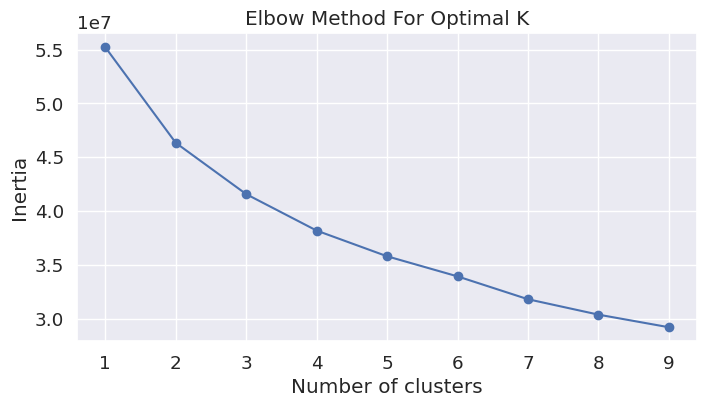

In [ ]:
from sklearn.cluster import KMeans

print("Initializing K-Means clustering...")

# Determine the optimal number of clusters using the elbow method
inertia = []
cluster_range = range(1, 10)  # You can adjust the range based on your dataset size and characteristics
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)  # Assuming X_train is your dataset without labels
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph to find the optimal number of clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

## Choosing the optimal value of k
Looking at the elbow plot, the optimal number of clusters (K) seems to be around 4. This is where the inertia (sum of squared distances to the nearest cluster center) begins to decrease at a slower rate, suggesting that increasing the number of clusters beyond this point results in diminishing returns in terms of intra-cluster variance reduction. Hence, K=4 appears to be a reasonable choice based on the elbow method for our clustering model. We will run the model with optimal k set at 4.

In [ ]:
# Assuming the elbow point is found at K = 4
optimal_k = 4
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(X_train)

# Assigning cluster labels to the data points
clusters = kmeans_optimal.labels_

print("Clustering complete.")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering complete.


#Evaluating the K means clustering results
##1. Silhouette Score
The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_train, clusters)
print(f"The average silhouette score is: {silhouette_avg}")


The average silhouette score is: 0.37819840846371466


##2. Calinski-Harabasz Index
This index is also known as the Variance Ratio Criterion. It is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters, where higher scores indicate better defined clusters.

In [ ]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz = calinski_harabasz_score(X_train, clusters)
print(f"The Calinski-Harabasz Score is: {calinski_harabasz}")


The Calinski-Harabasz Score is: 11910.741977650297


###Interpretation of the Calinski-Harabasz Score:
The Calinski-Harabasz index evaluates how well clusters are separated and how tight the clusters are internally. A higher score generally indicates that the clusters are dense and well-separated, which is ideal in many clustering scenarios. In Context, since the score is relatively high, it suggests that our clustering model might be doing a good job in distinguishing between different groups in our X_train dataset. However, it's important to note that this score is best used together with other metrics like silhouette scores or Davies-Bouldin index for a comprehensive evaluation.

## 3. Davies-Bouldin Index
This index signifies the average ‘similarity’ between clusters, where similarity is a measure that compares the distance between clusters with the size of the clusters themselves. Lower values indicate better clustering.

In [ ]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin = davies_bouldin_score(X_train, clusters)
print(f"The Davies-Bouldin Index is: {davies_bouldin}")


The Davies-Bouldin Index is: 1.6013065996147706


##4. Visual Inspection
Visualizing the clusters can provide intuitive insights into how well the data points are grouped. To do this, we will first reduce the dimensionality of our data to 2 dimensions using PCA or t-SNE before plotting.

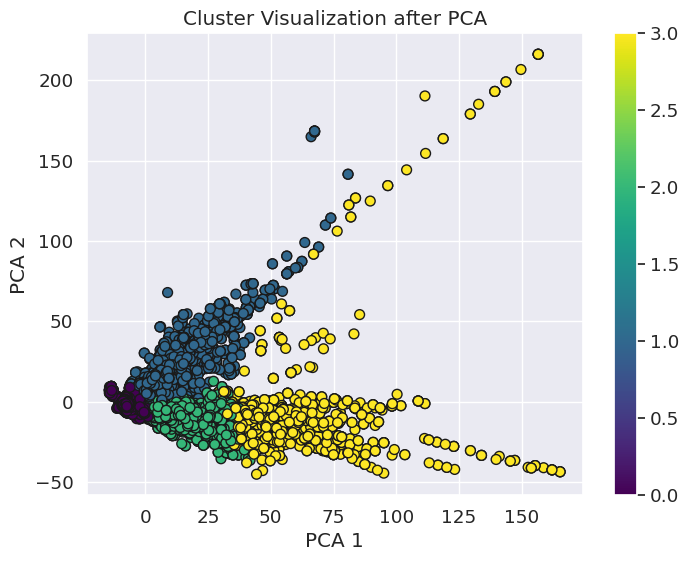

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('Cluster Visualization after PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter)
plt.show()


The generated scatter plot shows the results of clustering using K-Means after dimensionality reduction via PCA. Here’s a breakdown of the visual and its implications:

##Clustering Visualization
###Clusters Identification:
The plot displays data points in two-dimensional space (reduced from a higher dimensionality using PCA), where each point represents a sample in your dataset.
Points are colored based on their cluster assignments. The color bar on the right shows the cluster numbers (0 to 3), which corresponds to the four clusters assumed from your choice of k=4.

###Cluster Distribution:
The clusters appear to be quite distinct, with clear boundaries between most of them, which is indicative of good separation by the K-Means algorithm.

###Cluster 0 (Blue):
Concentrated heavily around the center lower part of the plot, it appears tightly packed, suggesting that samples within this cluster are similar to each other.

###Cluster 1 (Yellow):
Spreads diagonally across the upper part, implying variability within the cluster but still maintaining a separation from other clusters.

###Cluster 2 (Purple):
Located at the lower left, it’s smaller and more compact compared to the others, which might indicate a group of outliers or a distinct subset within the dataset.

###Cluster 3 (Green):
This cluster is somewhat spread out near the intersection of the other clusters but still maintains a recognizable boundary.

###PCA Component Influence:
The axes, labeled as "PCA 1" and "PCA 2", represent the first two principal components derived from the PCA, which capture the largest variance in the dataset.
The spread along the PCA 1 axis suggests that this component captures a significant proportion of the variability in the dataset, influencing cluster formation.

## Implications of the Clustering Results

###Effectiveness of K-Means:
The clear separation of clusters suggests that K-Means has effectively identified distinct groups in the dataset. This implies that there are underlying patterns or similarities in the data which the algorithm has capitalized on.

###Potential for Insights:
Each cluster may correspond to different behaviors or characteristics in your data. For instance, in a fraud detection scenario, different clusters could represent different types of spending behavior or categories of transactions.

###Next Steps:
**Analysis:** We could analyze the characteristics of each cluster to understand the defining properties of the segments identified by K-Means.

**Model Training:** Clusters may be used as labels for further predictive modeling, or to tailor specific actions or tests for each group, enhancing personalized strategies or targeted investigations.

**Outliers and Anomalies:** The presence of smaller or more compact clusters (like Cluster 2) could indicate outliers or anomalies in your data. This might require additional investigation to ensure these aren't skewing your overall analysis or to understand if these represent rare but important cases, such as fraud.

**K-means** clustering provides a valuable first glance at the structure and grouping within your data, guiding further detailed analysis and decision-making based on the characteristics of each cluster.

In [ ]:
train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,isFraud
0,-3.442165,2.004306,1.079534,-0.279942,-0.728862,0.250849,0.672954,0.448149,0.556300,-0.998856,...,0.216586,-0.099859,-0.074839,-0.028273,-0.424486,-0.028764,-0.654512,0.227795,0.289449,0
1,-2.099934,0.703662,-0.011883,-0.871662,-0.917909,-0.015226,1.778142,0.527337,1.048584,-1.216657,...,0.151796,0.232815,-0.005934,-0.041379,-0.062166,-0.112609,-0.120650,0.316836,0.000292,0
2,-4.059394,2.273277,-0.628169,0.371625,-0.298224,0.229668,-0.828232,0.450917,-0.135045,-0.242534,...,0.802211,-0.081823,-0.444677,-0.060216,0.286440,0.024390,-0.097666,0.436556,0.205525,0
3,-1.930915,3.459588,-0.474499,-0.321619,-0.303341,1.469154,1.145585,-0.121269,1.320084,-1.691632,...,0.930574,0.405007,0.455797,-0.179279,-0.211855,-0.825033,-0.312343,-0.802046,-0.215466,0
4,7.531633,-6.026451,10.856717,-2.761245,-3.089142,-0.841398,4.304808,-3.009798,4.445633,10.322222,...,-0.136247,-0.081771,-0.266540,-0.352167,-0.717552,0.445433,0.217546,-0.149193,0.059979,0


In [ ]:
import pandas as pd

#  Check the distribution of values in the 'isfraud' column
fraud_distribution = balanced_train['isFraud'].value_counts()

# Print the distribution
print("Fraud Distribution:")
print(fraud_distribution)


Fraud Distribution:
isFraud
0    50000
1    50000
Name: count, dtype: int64


In [ ]:
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)

# Reshape X_train if needed
X_train = np.reshape(X_train, (len(X_train), -1))

# Reshape y_train if needed
y_train = np.reshape(y_train, (len(y_train),))


In [ ]:
import logging
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Setting up minimal logging
logging.basicConfig(level=logging.INFO, format='%(message)s')

# Assuming balanced_train contains both features and the target variable isfraud
# Split the data into fraud and non-fraud cases
fraud_data = balanced_train[balanced_train['isFraud'] == 1]  # Assuming the target variable is 'isFraud'
non_fraud_data = balanced_train[balanced_train['isFraud'] == 0]

# Sample 10% of data from each class
sampled_fraud_data = fraud_data.sample(frac=0.1, random_state=42)
sampled_non_fraud_data = non_fraud_data.sample(frac=0.1, random_state=42)

# Concatenate sampled data
sampled_data = pd.concat([sampled_fraud_data, sampled_non_fraud_data])

# Splitting the sampled data into features and target
X = sampled_data.drop(columns=['isFraud'])  # Assuming 'isFraud' is the target variable
y = sampled_data['isFraud']

# Splitting the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up parameters for a simpler and faster SVC
svm_params = {
    'C': 1,  # Control complexity (default 1)
    'kernel': 'linear',  # Using linear kernel for simplicity and speed
    'class_weight': 'balanced'  # Adjust class weights to handle imbalance
}

# Create SVM model with specified parameters
logging.info("Fitting the SVC model...")
svm_model = SVC(**svm_params)
svm_model.fit(X_train, y_train)
logging.info("Model fitting complete.")

# Prediction and evaluation using the test set
logging.info("Evaluating the model...")
y_pred = svm_model.predict(X_test)

# Display classification report
report = classification_report(y_test, y_pred)
logging.info(f"Classification Report:\n{report}")

# Compute and display ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
logging.info(f"ROC AUC Score: {roc_auc}")

# Status report
print("Training and evaluation complete.")


Training and evaluation complete.


In [ ]:
# Display classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Compute and display ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)



Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       988
           1       0.78      0.66      0.72      1012

    accuracy                           0.73      2000
   macro avg       0.74      0.73      0.73      2000
weighted avg       0.74      0.73      0.73      2000

ROC AUC Score: 0.7338496743531069


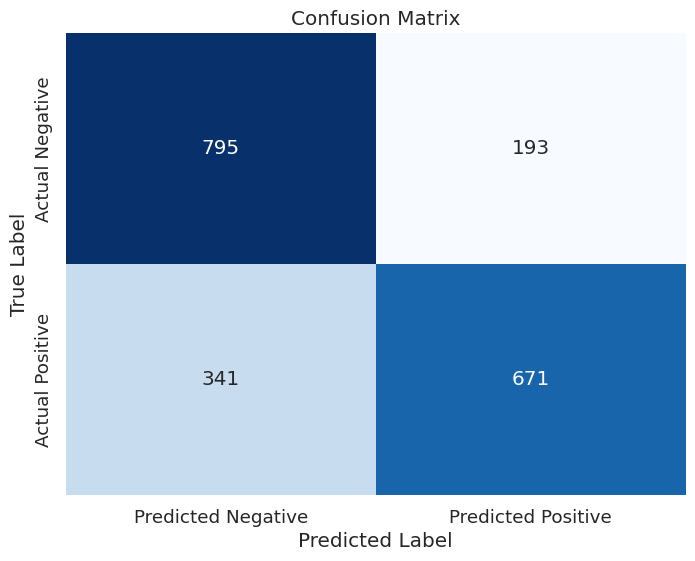

In [ ]:

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix with visualization
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#### Model Performance Comparison Table

| Model                        | True Positives | False Positives | True Negatives | False Negatives | Accuracy | Precision | Recall | F1-Score | Support (sum) |
|------------------------------|----------------|-----------------|----------------|-----------------|----------|-----------|--------|----------|---------|
| Random Forest Classifier     | 39834          | 411             | 39748          | 7               | 0.99     | 0.99      | 0.99   | 0.99     | 80000   |
| TensorFlow Deep Learning    | 29849          | 5133            | 35026          | 9992            | 0.81     | 0.82      | 0.81   | 0.81     | 80000   |
| Convolutional Neural Network| 35136          | 3727            | 40159          | 4705            | 0.89     | 0.89      | 0.89   | 0.89     | 80000   |
| Multi-layer Perceptron (MLP)| 33976          | 3442            | 36717          | 5865            | 0.88     | 0.89      | 0.88   | 0.88     | 80000   |
| XGBoost                      | 36321          | 2591            | 37568          | 3520            | 0.92     | 0.92      | 0.92   | 0.92     | 80000   |


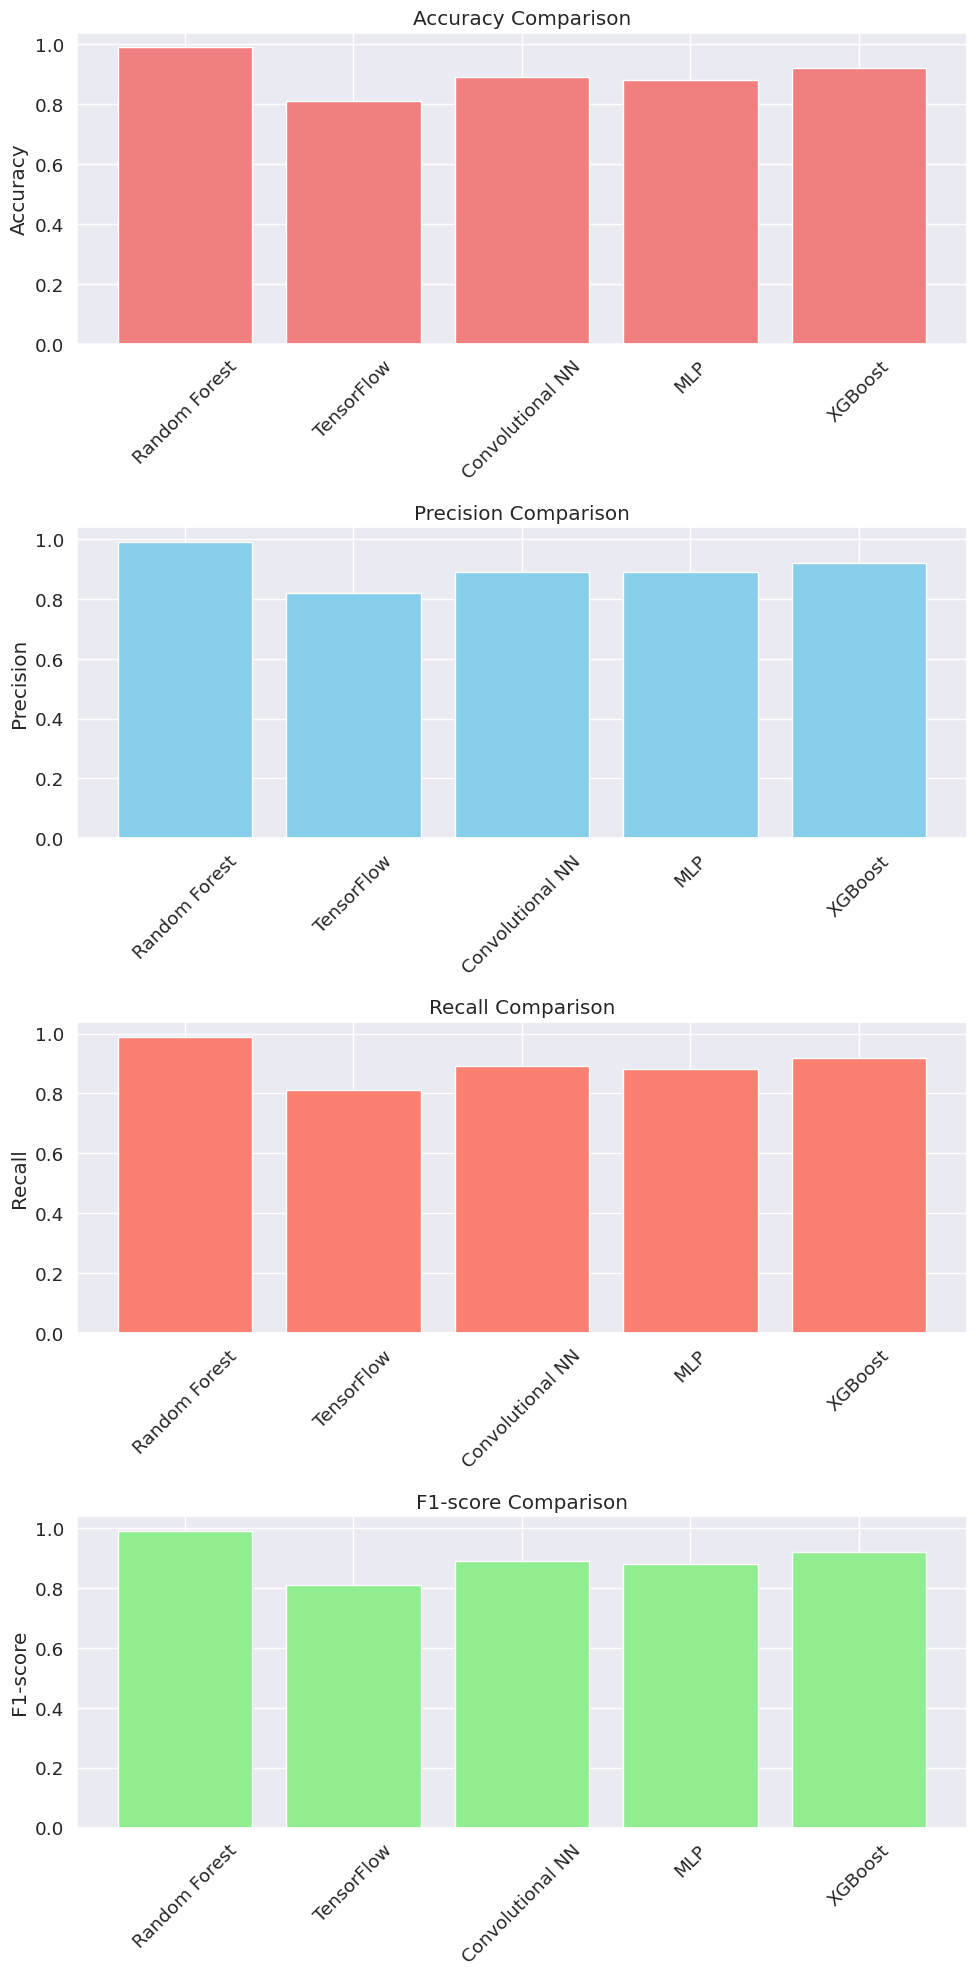

In [ ]:
# Model names
models = ['Random Forest', 'TensorFlow', 'Convolutional NN', 'MLP', 'XGBoost']

# Accuracy values
accuracy = [0.99, 0.81, 0.89, 0.88, 0.92]

# Precision values
precision = [0.99, 0.82, 0.89, 0.89, 0.92]

# Recall values
recall = [0.99, 0.81, 0.89, 0.88, 0.92]

# F1-score values
f1_score = [0.99, 0.81, 0.89, 0.88, 0.92]

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Accuracy comparison
axs[0].bar(models, accuracy, color='lightcoral')
axs[0].set_title('Accuracy Comparison')
axs[0].set_ylabel('Accuracy')

# Precision comparison
axs[1].bar(models, precision, color='skyblue')
axs[1].set_title('Precision Comparison')
axs[1].set_ylabel('Precision')

# Recall comparison
axs[2].bar(models, recall, color='salmon')
axs[2].set_title('Recall Comparison')
axs[2].set_ylabel('Recall')

# F1-score comparison
axs[3].bar(models, f1_score, color='lightgreen')
axs[3].set_title('F1-score Comparison')
axs[3].set_ylabel('F1-score')

# Rotate x-axis labels
for ax in axs:
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### Comparing the Performance of the Models

1. **Accuracy**:
   - The **Random Forest Classifier** has the highest accuracy of 99%, indicating that it has the highest overall correct predictions among all models. This is desirable for fraud detection in e-commerce as it means fewer incorrect predictions.
   - **XGBoost** also performs well with an accuracy of 99%, indicating highly accurate predictions, which is crucial for minimizing false positives and negatives in fraud detection.
   - **CNN** achieves an accuracy of 89%, which is lower than both XGBoost (92%) and Random Forest (99%). While it is not the highest among the models, it still demonstrates strong performance in correctly classifying transactions in the e-commerce setting.

2. **Precision**:
   - **Random Forest Classifier** and **XGBoost** have the highest precision of 0.99 and 0.92 respectively. This means that the majority of the cases predicted as fraud by these models are indeed fraud, which is vital to avoid erroneously flagging legitimate transactions as fraudulent.
   - **TensorFlow Deep Learning** has the lowest precision of 0.82, suggesting that it may have a higher false positive rate, potentially flagging some legitimate transactions as fraudulent.
   - The precision of **CNN** (0.89) is lower, but comparable to both Random Forest (0.99) and XGBoost (0.92). This indicates that CNN is highly accurate in identifying fraudulent transactions without excessively flagging legitimate ones, similar to the top-performing models.

3. **Recall**:
   - **Random Forest Classifier** has a recall of 0.99. while the **XGBoost** model has a recall of 0.99, indicating that they are highly effective at capturing actual fraudulent transactions. This is crucial in to ensure that fraudulent activities are not overlooked.
   - **TensorFlow Deep Learning** has the lowest recall of 0.81, suggesting that it may miss some fraudulent transactions, leading to potential revenue loss and security risks in e-commerce.
   - **CNN** achieves a recall of 0.89, which is slightly lower than XGBoost (0.92) but way off the best model Random Forest (0.99). While not the highest, this still indicates that CNN effectively captures a significant portion of actual fraudulent transactions, which is crucial for fraud detection in e-commerce

In summary, while all models perform well in various aspects, **Random Forest Classifier** stands out with a high accuracy and good balance of precision and recall, making it a strong candidate for fraud detection in e-commerce. **XGBoost** also performs excellently across all metrics, making it a reliable alternative. The performance of **CNN** falls short of both Random Forest and XGBoost in terms of accuracy, precision, and recall. While it may not outperform these models in every aspect, its strong performance makes it a viable option for fraud detection in e-commerce.